### Student Information
Name: 李柏葳

Student ID: 111065525

GitHub ID: bowen1248

Kaggle name: bowen1248

Kaggle private scoreboard snapshot:

![leaderboard](img/comp_result.jpg)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

## First part

In [4]:
### Preprocessing
import pandas as pd

### Load training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Combine 4 training-sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### Load 4 testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# Combine 4 testing-sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


### >>> Exercise 1 (Take home):
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

/tmp/ipykernel_2696/356754532.py:22: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  g1 = sns.barplot(x=train_tf_df_sorted["name"][:30],
/tmp/ipykernel_2696/356754532.py:23: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y=train_tf_df_sorted["freq"][:30])
/tmp/ipykernel_2696/356754532.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` look

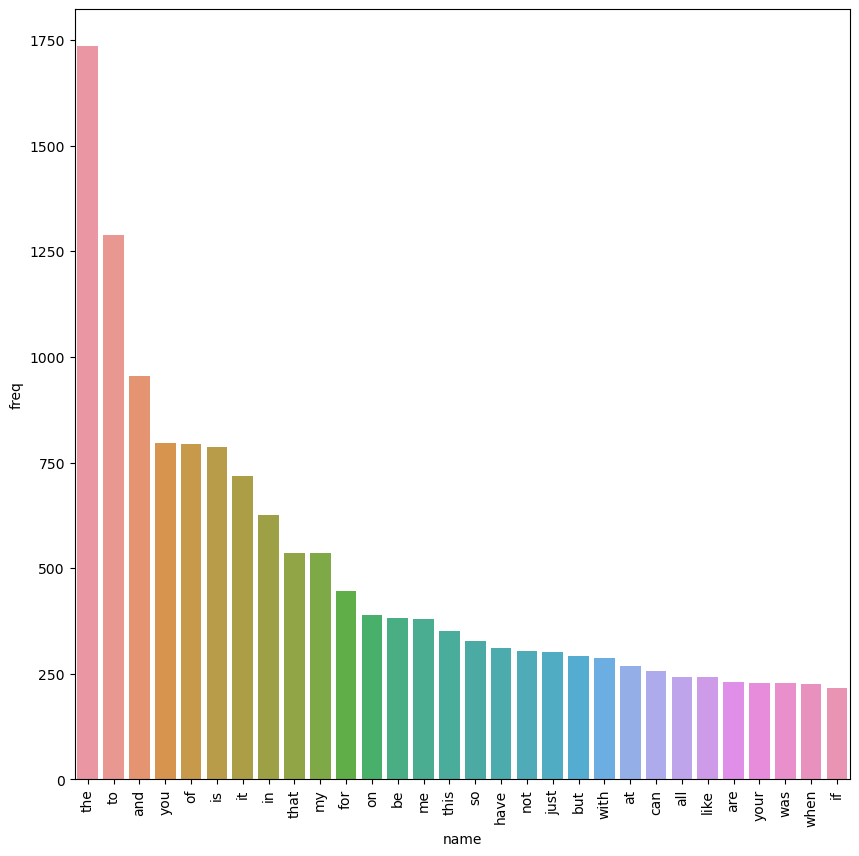

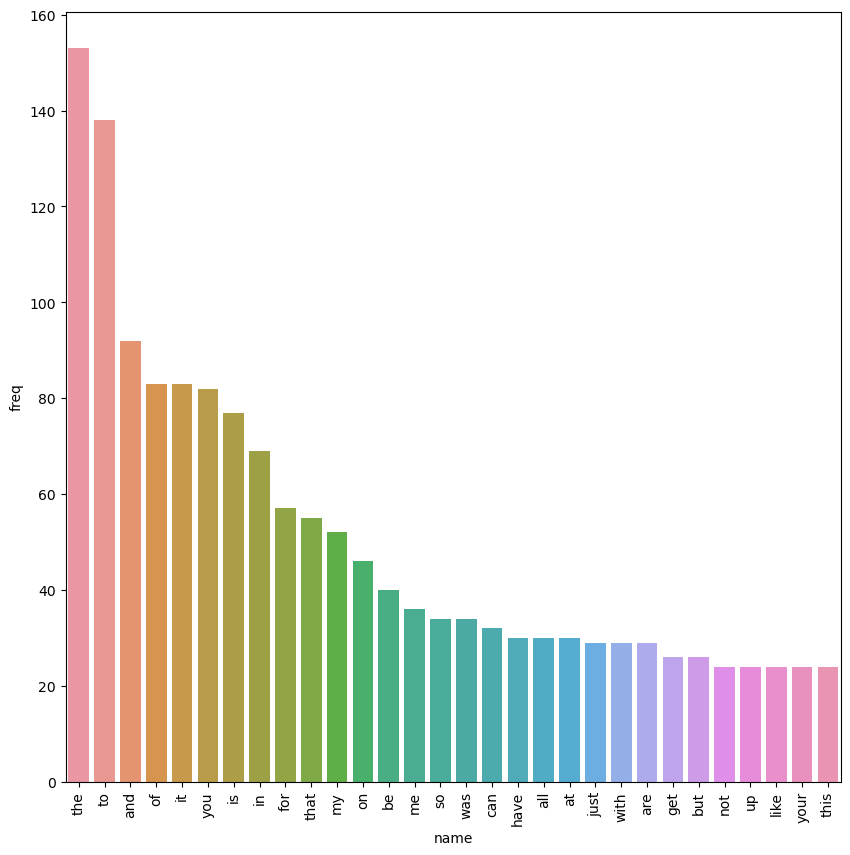

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Get sorted word frequency of training dataset
train_vectorizer = CountVectorizer()
train_vec = train_vectorizer.fit_transform(train_df['text'])
train_tf = np.asarray(train_vec.sum(axis=0))[0]
train_tf_df = pd.DataFrame({"freq": train_tf, "name": train_vectorizer.get_feature_names_out()})
train_tf_df_sorted = train_tf_df.sort_values(by=['freq'], ascending=False)

### Get sorted word frequency of testing dataset
test_vectorizer = CountVectorizer()
test_vec = test_vectorizer.fit_transform(test_df['text'])
test_tf = np.asarray(test_vec.sum(axis=0))[0]
test_tf_df = pd.DataFrame({"freq": test_tf, "name": test_vectorizer.get_feature_names_out()})
test_tf_df_sorted = test_tf_df.sort_values(by=['freq'], ascending=False)

### Plot train data word frequency
plt.subplots(figsize=(10, 10))
g1 = sns.barplot(x=train_tf_df_sorted["name"][:30], 
            y=train_tf_df_sorted["freq"][:30])
g1.set_xticklabels(train_tf_df_sorted["name"][:30], rotation = 90);

### Plot test data word frequency
plt.subplots(figsize=(10, 10))
g2 = sns.barplot(x=test_tf_df_sorted["name"][:30], 
            y=test_tf_df_sorted["freq"][:30])
g2.set_xticklabels(test_tf_df_sorted["name"][:30], rotation = 90);

### >>> Exercise 2 (Take home):
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

### Directly get TF-IDF feature from training data's text
TF_1000 = TfidfVectorizer(max_features = 1000, tokenizer=nltk.word_tokenize)
train_tf_1000 = TF_1000.fit_transform(train_df.text)
print(TF_1000.get_feature_names_out()[100:110])
print(train_tf_1000.shape)


['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']
(3613, 1000)


### >>> Exercise 3 (Take home):
Can you interpret the results above? What do they mean?

1. The training accuracy is much higher than testing accuracy, in fact the accuracy of training is almost 1, while testing result indicates classifier only gets two-thirds right. So we can see that the model is learning too well in train dataset domain (maybe model have overfitted), but classifier itself have not really learn the distribution that can identify general tweets well. This shows that decision tree classifier is a good classifier for Bag of words method, we can decrease trees depth to solve overfitting problem. However bag of words itself is not looking good in tweet identifying.

2. We can see how classifier confuse predicted label to actual label by observe confusion matrix. In confusion matrix, we can see that classifier is most often predict wrong result between angry and fear tweet, since there are 16 fear tweets that is actually angry tweets, and 20 angry tweets that is actually fear tweets. And then we need to print out wrong predictions to investigate further.

3. Another points worth mentioning is sadness tweets have lowest precision and recall rates, and it tends to confuse evenly distributed to all 3 other emotions.

### >>> Exercise 4 (Take home): 
Build a model using a Naive Bayes model and train it. What are the testing results?

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [7]:
# for a classificaiton problem, you need to provide both training & testing data
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

/home/bowen/miniconda3/envs/DM_2022/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

## DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)
DT_model = DT_model.fit(X_train, y_train)
DT_train_pred = DT_model.predict(X_train)
DT_test_pred = DT_model.predict(X_test)

## DecisionTree model with limited depth
DT_model_2 = DecisionTreeClassifier(random_state=0, max_depth=80)
DT_model_2 = DT_model_2.fit(X_train, y_train)
DT_train_pred_2 = DT_model_2.predict(X_train)
DT_test_pred_2 = DT_model_2.predict(X_test)

## Naive Bayes model
NB_clf = MultinomialNB()
NB_clf.fit(X_train, y_train)
NB_train_pred = NB_clf.predict(X_train)
NB_test_pred = NB_clf.predict(X_test)



In [9]:
# Results
from sklearn.metrics import accuracy_score
from sklearn import metrics

### Decision tree pred result
acc_train = accuracy_score(y_true=y_train, y_pred=DT_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=DT_test_pred)

print('Decision tree training accuracy: {}'.format(round(acc_train, 2)))
print(metrics.classification_report(DT_train_pred, y_train))
print(metrics.confusion_matrix(DT_train_pred, y_train))

print('Decision tree testing accuracy: {}'.format(round(acc_test, 2)))
print(metrics.classification_report(DT_test_pred, y_test))
print(metrics.confusion_matrix(DT_test_pred, y_test))

### Decision tree with limit pred result
acc_train = accuracy_score(y_true=y_train, y_pred=DT_train_pred_2)
acc_test = accuracy_score(y_true=y_test, y_pred=DT_test_pred_2)

print('Decision tree with limit training accuracy: {}'.format(round(acc_train, 2)))
print(metrics.classification_report(DT_train_pred_2, y_train))
print(metrics.confusion_matrix(DT_train_pred_2, y_train))

print('Decision tree with limit testing accuracy: {}'.format(round(acc_test, 2)))
print(metrics.classification_report(DT_test_pred_2, y_test))
print(metrics.confusion_matrix(DT_test_pred_2, y_test))

### Naive Bayes pred result
acc_train = accuracy_score(y_true=y_train, y_pred=NB_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=NB_test_pred)

print('Naive Bayes training accuracy: {}'.format(round(acc_train, 2)))
print(metrics.classification_report(NB_train_pred, y_train))
print(metrics.confusion_matrix(NB_train_pred, y_train))

print('Naive Bayes testing accuracy: {}'.format(round(acc_test, 2)))
print(metrics.classification_report(NB_test_pred, y_test))
print(metrics.confusion_matrix(NB_test_pred, y_test))

Decision tree training accuracy: 0.99
              precision    recall  f1-score   support

       anger       1.00      0.97      0.98       888
        fear       1.00      0.98      0.99      1164
         joy       1.00      1.00      1.00       820
     sadness       0.94      1.00      0.97       741

    accuracy                           0.99      3613
   macro avg       0.98      0.99      0.99      3613
weighted avg       0.99      0.99      0.99      3613

[[ 857    3    2   26]
 [   0 1144    1   19]
 [   0    0  820    0]
 [   0    0    0  741]]
Decision tree testing accuracy: 0.66
              precision    recall  f1-score   support

       anger       0.65      0.63      0.64        87
        fear       0.69      0.66      0.68       115
         joy       0.68      0.70      0.69        77
     sadness       0.59      0.65      0.62        68

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg     

### >>> Exercise 5 (Take home):
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The training accuracy of the Decision tree model is much higher than the Naive Bayes model, while testing accuracy is relative same. Is this result caused by overfitting? I experienced it with another limited depth decision tree to make training accuracy lower, however testing accuracy remains the same. This shows that decision tree classifier is a good classifier for Bag of words method, we can decrease trees depth to solve overfitting problem. However bag of words itself is not looking good in tweet identifying. Due to it did not consider relation of words in sentence, nor does like TF-IDF to fliter high frequency words.

### >>> Exercise 6 (Take home):
Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

In [10]:
## deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder
import keras

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

2022-11-27 22:08:24.878893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 0    anger
1    anger
2    anger
3    anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)
input_shape:  500
output_shape:  4


In [11]:
### Create NN model
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2022-11-27 22:08:25.782920: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 22:08:25.784873: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/home/bowen/miniconda3/envs/DM_2022/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 1s 5ms/step - loss: 1.3345 - accuracy: 0.3504 - val_loss: 1.3014 - val_accuracy: 0.3890
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 1.0248 - accuracy: 0.6133 - val_loss: 0.9252 - val_accuracy: 0.6513
Epoch 3/25
113/113 [==============================] - 1s 7ms/step - loss: 0.5971 - accuracy: 0.7874 - val_loss: 0.7821 - val_accuracy: 0.6859
Epoch 4/25
113/113 [==============================] - 0s 3ms/step - loss: 0.4181 - accuracy: 0.8494 - val_loss: 0.7629 - val_accuracy: 0.6830
Epoch 5/25
113/113 [==============================] - 0s 4ms/step - loss: 0.3151 - accuracy: 0.8907 - val_loss: 0.8128 - val_accuracy: 0.7032
Epoch 6/25
  1/113 [..............................] - ETA: 3s - loss: 0.3240 - accuracy: 0.9062

2022-11-27 22:08:29.360586: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


113/113 [==============================] - 0s 4ms/step - loss: 0.2565 - accuracy: 0.9070 - val_loss: 0.8555 - val_accuracy: 0.6859
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9286 - val_loss: 0.9193 - val_accuracy: 0.6916
Epoch 8/25
113/113 [==============================] - 0s 3ms/step - loss: 0.1718 - accuracy: 0.9446 - val_loss: 0.9814 - val_accuracy: 0.6859
Epoch 9/25
 51/113 [============>.................] - ETA: 0s - loss: 0.1390 - accuracy: 0.9559

2022-11-27 22:08:30.737704: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


113/113 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9549 - val_loss: 1.0125 - val_accuracy: 0.6945
Epoch 10/25
113/113 [==============================] - 0s 3ms/step - loss: 0.1349 - accuracy: 0.9593 - val_loss: 1.0659 - val_accuracy: 0.6744
Epoch 11/25
113/113 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9676 - val_loss: 1.1300 - val_accuracy: 0.6772
Epoch 12/25
 68/113 [=================>............] - ETA: 0s - loss: 0.0922 - accuracy: 0.9738

2022-11-27 22:08:31.816128: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


113/113 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9701 - val_loss: 1.1759 - val_accuracy: 0.6657
Epoch 13/25
113/113 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.9732 - val_loss: 1.2146 - val_accuracy: 0.6715
Epoch 14/25
113/113 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 0.9737 - val_loss: 1.2897 - val_accuracy: 0.6686
Epoch 15/25
113/113 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9745 - val_loss: 1.2810 - val_accuracy: 0.6686
Epoch 16/25
 52/113 [============>.................] - ETA: 0s - loss: 0.0585 - accuracy: 0.9826

2022-11-27 22:08:33.302260: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


113/113 [==============================] - 0s 4ms/step - loss: 0.0788 - accuracy: 0.9756 - val_loss: 1.3693 - val_accuracy: 0.6772
Epoch 17/25
113/113 [==============================] - 0s 3ms/step - loss: 0.0792 - accuracy: 0.9745 - val_loss: 1.3584 - val_accuracy: 0.6657
Epoch 18/25
113/113 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9765 - val_loss: 1.3461 - val_accuracy: 0.6715
Epoch 19/25
113/113 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.9770 - val_loss: 1.3957 - val_accuracy: 0.6744
Epoch 20/25
113/113 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9776 - val_loss: 1.4150 - val_accuracy: 0.6657
Epoch 21/25
113/113 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9773 - val_loss: 1.4242 - val_accuracy: 0.6744
Epoch 22/25
113/113 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 0.9803 - val_loss: 1.4578 - val_accuracy: 0.6772
Epoch 23/25

2022-11-27 22:08:36.514452: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


113/113 [==============================] - 1s 4ms/step - loss: 0.0587 - accuracy: 0.9773 - val_loss: 1.4612 - val_accuracy: 0.6715
Epoch 24/25
113/113 [==============================] - 0s 2ms/step - loss: 0.0557 - accuracy: 0.9790 - val_loss: 1.4827 - val_accuracy: 0.6686
Epoch 25/25
113/113 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9798 - val_loss: 1.5268 - val_accuracy: 0.6715
training finish


In [13]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

3/3 [==============================] - 0s 6ms/step
testing accuracy: 0.67


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.350401,1.334527,0.389049,1.301444
1,1,0.613341,1.024797,0.651297,0.925156
2,2,0.787434,0.597138,0.685879,0.782068
3,3,0.849433,0.418128,0.682997,0.762901
4,4,0.890673,0.315129,0.703170,0.812767
5,5,0.907003,0.256525,0.685879,0.855472
6,6,0.928591,0.210632,0.691643,0.919327
7,7,0.944644,0.171786,0.685879,0.981355
8,8,0.954885,0.147160,0.694524,1.012488
9,9,0.959314,0.134907,0.674352,1.065897


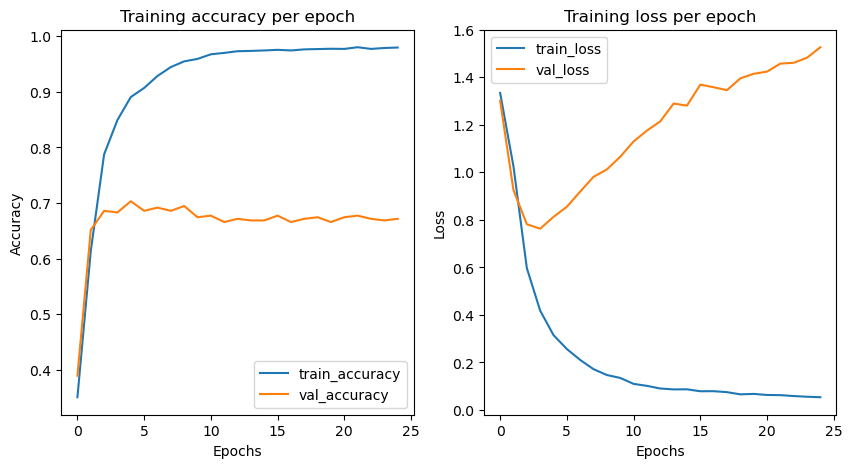

In [14]:
import numpy as np
import matplotlib.pyplot as plt
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
 
# Plotting the Graph
line1, = ax1.plot(training_log['epoch'], training_log['accuracy'])
line2, = ax1.plot(training_log['epoch'], training_log['val_accuracy'])
ax1.set_title("Training accuracy per epoch")
ax1.set(xlabel="Epochs", ylabel="Accuracy")
ax1.legend([line1, line2], ["train_accuracy", "val_accuracy"])

line3, = ax2.plot(training_log['epoch'], training_log['loss'])
line4, = ax2.plot(training_log['epoch'], training_log['val_loss'])
ax2.set_title("Training loss per epoch")
ax2.set(xlabel="Epochs", ylabel="Loss")
ax2.legend([line3, line4], ["train_loss", "val_loss"])

plt.show()

From picture we can see that the training accuracy per epochrise sharply at beginning, and convergence around 0.95. But the validation accuracy is at 0.7. The training loss per epoch is lower and lower per epoch, but the validation loss is higher after around 3 epochs. So this is clearly overfitting. In general what you want to do is choose more complex model, but in this case ,from example 5 we can see that BOW is not a good feature to determine emotions. 

### >>> Exercise 7 (Take home):
Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

In [15]:
### This code will avarage all word vector in a sentence
import gensim
import warnings
import nltk
from gensim.models import Word2Vec

warnings.filterwarnings('ignore')

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()
training_corpus = train_df['text_tokenized'].values

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

# Get the avarage vector of the sentence
def sentence_to_vector(sentence):
    ans = np.zeros(vector_dim)
    list = nltk.word_tokenize(sentence)
    for word in list:
        ans += word2vec_model.wv[word]
    
    return ans

sen1 = "I am happy"
vec1 = sentence_to_vector(sen1)
print("10 most simliar words from this avaraged vector.")
print(word2vec_model.wv.most_similar(positive=vec1, topn=10))

sen2 = "Happy course"
vec2 = sentence_to_vector(sen2)
print("10 most simliar words from this avaraged vector.")
print(word2vec_model.wv.most_similar(positive=vec2, topn=10))

sen3 = "I am happy that I attend this happy course"
vec3 = sentence_to_vector(sen3)
print("10 most simliar words from this avaraged vector.")
print(word2vec_model.wv.most_similar(positive=vec3, topn=10))

sen4 = "I am happy."
vec4 = sentence_to_vector(sen4)
print("10 most simliar words from this avaraged vector.")
print(word2vec_model.wv.most_similar(positive=vec4, topn=10))

10 most simliar words from this avaraged vector.
[('irl', 0.9632308483123779), ('sorry', 0.9628669619560242), ('now', 0.9624781012535095), ('still', 0.9536698460578918), ('venom', 0.9514809846878052), ('exact', 0.9509356021881104), ('320', 0.9506611227989197), ('gon', 0.9484785795211792), ('havent', 0.9467341303825378), ('faint', 0.9461514949798584)]
10 most simliar words from this avaraged vector.
[('horrid', 0.9951730966567993), ('Very', 0.9938445091247559), ('potential', 0.992762565612793), ('levity', 0.9926843047142029), ('Happy', 0.991764485836029), ('chavs', 0.9915977716445923), ('info', 0.9914928674697876), ('played', 0.9914575815200806), ('Old', 0.9910311102867126), ('slip', 0.9903839230537415)]
10 most simliar words from this avaraged vector.
[('exact', 0.9627048969268799), ('venom', 0.961472749710083), ('sorry', 0.9595969319343567), ('irl', 0.9586034417152405), ('somebody', 0.9584000706672668), ('still', 0.9568207859992981), ('elated', 0.9545784592628479), ('sure', 0.95354306

The simplest method of transform a sentence into the word vector is to avarage out all words into vector. I have implement this method at above cell. However this method is liable to biased toward high frequency words even punctuation Marks. There are some improved way of doing sentence to vector, like multiply result vector with TF-IDF feature, avoid high frequency word when inputting sentence as if you are using google search.

### >>> Exercise 8 (Take home):
Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [16]:
from gensim.models import KeyedVectors

## Load pretrained word2vec model
## Note: this model is very huge, this will take some time ...
model_path = "data/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [17]:
# Target word list
word_list = ['angry', 'happy', 'sad', 'fear']

# Find first 15 simliar words for target words
topn = 15
happy_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
angry_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
data_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
mining_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
angry_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
data_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
mining_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated',

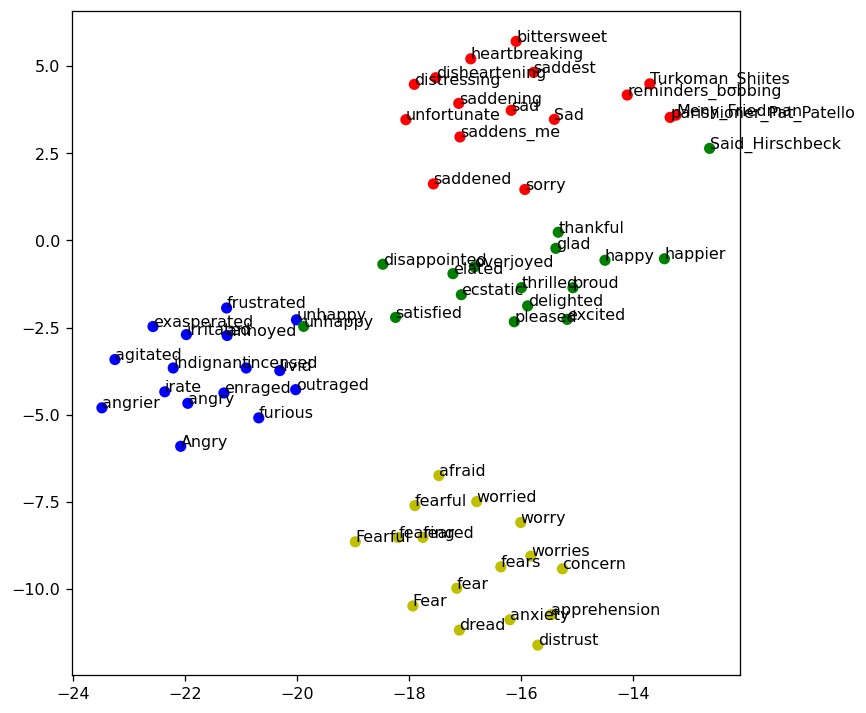

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Second Part
Participate in the in-class Kaggle Competition regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd.

### Report

The model I used for tweets emotion identification is BERT (Bidirectional Encoder Representations from Transformers), BERT is the encoder of Transformer. Originally created and published in 2018 by Jacob Devlin and his colleagues from Google. BERT had state-of-the-art performance when doing natural language understanding tasks. Funny things is that Google leveraging BERT in its search engine for queries. One huge advantage of BERT comes from its unsupervised nature, it can train lots of data without labeling data at first, which is both time and cost expansive.
In order to leverage the power of BERT, I use a pretrained version of BERT calls [BERTweet](https://github.com/VinAIResearch/BERTweet), BERTweet is pretrained by VinAIResearch on over 850 millions tweets based on the RoBERTa pre-training procedure and is the first public large-scale language model pre-trained for English Tweets.
The decoder I used is simply two layers of NN with RELU and softmax layer for output. With cross entropy loss and adam optimizer with initial learning rate of 1e-5. The best result I get is 0.465 in public leaderboard which is about one-third on leaderboard. There are some improvement I can experiment but unable to do so listed below, due to the limitation of hardware and time. 1 epoch of about 600000 training tweets takes about 3 hours to train.

1. I have flitered out comma and space of the tweets during training and inferencing, due to the reason of BERT's limited input of 128 characters and frequency of space is a lot. But maybe without these procedure, accuracy can be better.
2. The training accuracy of 5 epoch training is 0.73, however the result on kaggle is only 0.465, maybe overfitting have happened, I should use more complex model such as RNN decoder or more layer of NN.
3. Train with more samples of tweets, however my RAM is at limit with 600000 tweets during training.
4. Train more epochs to see if the testing result on Kaggle is better or not.

If fully optimized, I think BERTweet can get around the limitation accuracy of human. Because the tweets itself is not easy to recognize even by humans, there are some mixed emotions between words, and the emotion is subjective. The data is not always right about its label.

### BERT under training

![training](img/bert_training.png)

### Training script
Note: The hardware usage of the project will be too high that kernel will be dead running. So I run the whole kaggle project with python script file on the server.

In [ ]:
import os
import gc
import tensorflow as tf
from transformers import TFAutoModel
from transformers import BertweetTokenizer
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import keras

In [ ]:
### Check if GPU is available
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
### Load data identification
data_identification = pd.read_csv("data/data_identification.csv")

### Load emotion of data
emotion = pd.read_csv("data/emotion.csv")

### Tweets dataset
tweets_DM = pd.read_json("data/tweets_DM.json", lines=True, dtype=False)
print(tweets_DM.shape)

In [ ]:
### Get only tweets_id and text attribute
tweets = tweets_DM._source
tweets = pd.json_normalize(tweets)
tweets = tweets.rename(columns={"tweet.hashtags":"hashtags", "tweet.tweet_id":"tweet_id", "tweet.text":"text"})
tweets = tweets.drop(["hashtags"], axis=1)

### Merge identification of data to tweets
tweets = pd.merge(tweets, data_identification, on="tweet_id", how="left")

In [ ]:
### Clear special symbol
tweets['text'] = tweets['text'].str.replace(' ', '')
tweets['text'] = tweets['text'].str.replace('#', '')

In [ ]:
### Get train and test dataset
df_train = tweets[tweets["identification"] == "train"]
df_train = df_train.drop(columns=['identification'])
df_train = pd.merge(df_train, emotion, on="tweet_id")

In [ ]:
### Check data corruption
df_train.isnull().sum()
df_train.duplicated().sum()
df_train.groupby(['emotion']).count()['text']

In [ ]:
### Save data to local storage
df_train.to_pickle("data/df_train.pkl")

In [ ]:
### Samples of each categories
### This is almost my limitation, if too large my ram will be out of space
targ = int(70000)

# Form new balanced training dataset
df_anger = df_train[df_train['emotion'] == 'anger']
df_anticipation = df_train[df_train['emotion'] == 'anticipation'].sample(targ)
df_disgust = df_train[df_train['emotion'] == 'disgust'].sample(targ)
df_fear = df_train[df_train['emotion'] == 'fear']
df_joy = df_train[df_train['emotion'] == 'joy'].sample(targ)
df_sadness = df_train[df_train['emotion'] == 'sadness'].sample(targ)
df_surprise = df_train[df_train['emotion'] == 'surprise']
df_trust = df_train[df_train['emotion'] == 'trust'].sample(targ)
df_train_balanced = pd.concat([df_anger, df_anticipation, df_disgust, df_fear, df_joy, df_sadness, df_surprise, df_trust], ignore_index=True)

In [ ]:
# Clean up memory to prevent crash
del df_anger
del df_anticipation
del df_disgust
del df_fear
del df_joy
del df_sadness
del df_surprise
del df_trust
del df_train
del targ
del emotion
del tweets
del data_identification
del tweets_DM

In [ ]:
# The length of each tweets to inference, rest will be truncated.
seq_len = 128
num_samples = len(df_train_balanced)
print(num_samples)

In [ ]:
# Collect garbage to free up some ram
gc.collect()

In [ ]:
# Note: From now on, the hardware usage will be too high that kernel will be dead running this cell and below.
#       So I run the whole kaggle project with python script file on the server.
# Initialize tokenizer
tokenizer = BertweetTokenizer.from_pretrained('vinai/bertweet-base', nomralization=True)

# Tokenize the tweets and returning Numpy tensors
tokens = tokenizer(df_train_balanced['text'].tolist(), max_length=seq_len, truncation=True,
                   padding='max_length', add_special_tokens=True,
                   return_tensors='tf')

In [ ]:
# Get required input for a bert model, input ids, token type id attention masks
tokens.keys()

In [ ]:
# Need to transform into tensorflow tensor type
Xids = tokens['input_ids']
Xmask = tokens['attention_mask']
Xtoktype = tokens['token_type_ids']
Xids = tf.cast(Xids, 'float64')
Xmask = tf.cast(Xmask, 'float64')
Xtoktype = tf.cast(Xtoktype, 'float64')
del tokens

In [ ]:
# Extrace and one hot encode the labels
arr = df_train_balanced['emotion']
le = LabelEncoder()
arr = le.fit_transform(arr)
print(le.classes_)
labels = np.zeros((num_samples, arr.max()+1))
print(labels.shape)
labels[np.arange(num_samples), arr] = 1
print(labels[100])

In [ ]:
# Transform ids, masks, labels into a tensorflow dataset type
dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

def map_func(input_ids, masks, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

# Then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)
print(dataset.take(1))

In [ ]:
# Set batch size and shuffle data
batch_size = 16
dataset = dataset.shuffle(labels.shape[0]).batch(batch_size, drop_remainder=True)
print(dataset.take(1))

# Do train-val split
split = 0.9
# we need to calculate how many batches must be taken to create 90% training set
size = int((Xids.shape[0] / batch_size) * split)
print(size)
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

# Free up memory
del dataset

In [ ]:
# Save arranged data
tf.data.experimental.save(train_ds, 'data/train_ds')
tf.data.experimental.save(val_ds, 'data/val_ds')

In [ ]:
# Extrace and one hot encode the labels
import keras
from sklearn.preprocessing import LabelEncoder
arr = df_train_balanced['emotion']
le = LabelEncoder()
arr = le.fit_transform(arr)
labels = np.zeros((num_samples, arr.max()+1))
labels.shape

In [ ]:
# Save arranged data
tf.data.experimental.save(train_ds, 'data/train_ds')
tf.data.experimental.save(val_ds, 'data/val_ds')

In [ ]:
# Load pretrained BERTtweets model
bert = TFAutoModel.from_pretrained('vinai/bertweet-base')
bert.summary()

In [ ]:
# Create model
# Two input layers, we ensure layer name variables match to dictionary keys in TF dataset
input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')
toktypeid = tf.keras.layers.Input(shape=(seq_len,), name='token_type_ids', dtype='int32')
# Access final activations (alread max-pooled) [1]
embeddings = bert.roberta(input_ids, attention_mask=mask)[1] 

# Convert bert embeddings into 5 output classes
x = tf.keras.layers.Dense(2048, activation='relu')(embeddings)
x1 = tf.keras.layers.Dropout(0.2)(x)
x2 = tf.keras.layers.Dense(64, activation='relu')(x1)
x3 = tf.keras.layers.Dropout(0.2)(x2)
y = tf.keras.layers.Dense(8, activation='softmax', name='outputs')(x)

# Initialize model
model = tf.keras.Model(inputs=[input_ids, toktypeid, mask], outputs=y)
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

element_spec = ({'input_ids': tf.TensorSpec(shape=(16, seq_len), dtype=tf.float64, name=None),
                 'attention_mask': tf.TensorSpec(shape=(16, seq_len), dtype=tf.float64, name=None)},
                 # 'token_type_ids': tf.TensorSpec(shape=(16, seq_len), dtype=tf.float64, name=None)},
                tf.TensorSpec(shape=(16, 8), dtype=tf.float64, name=None))

# Load the training and validation sets
train_ds = tf.data.experimental.load('data/train_ds', element_spec=element_spec)
val_ds = tf.data.experimental.load('data/val_ds', element_spec=element_spec)
print(train_ds)

# Optimizers to the model
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-6)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [ ]:
# Training
# Note: 1 epoch will run about 180 mins with RTX2070S card
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    shuffle=True
)

# Save model
model.save('DM_model_3')

### Inference script

In [ ]:
import keras
import os
import tensorflow as tf
from transformers import BertweetTokenizer
from tqdm import tqdm
import numpy as np
import pandas as pd

### Check if GPU is available
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

### Load data id
data_identification = pd.read_csv("data/data_identification.csv")

### Load tweets dataset
tweets_DM = pd.read_json("data/tweets_DM.json", lines=True, dtype=False)
tweets = tweets_DM._source
tweets = pd.json_normalize(tweets)
tweets = tweets.rename(columns={"tweet.hashtags":"hashtags", "tweet.tweet_id":"tweet_id", "tweet.text":"text"})
tweets = tweets.drop(["hashtags"], axis=1)
tweets = pd.merge(tweets, data_identification, on="tweet_id", how="left")

### Clear special symbol
tweets['text'] = tweets['text'].str.replace(' ', '')
tweets['text'] = tweets['text'].str.replace('#', '')

### Get and save tweets test dataset
df_test = tweets[tweets["identification"] == "test"]
df_test = df_test.drop(columns=['identification'])
df_test.to_pickle("data/df_test.pkl")
df_test = df_test[:100]

# The length of each tweets to inference, rest will be truncated.
seq_len = 128
num_samples = len(df_test)
seq_len, num_samples

# Initialize tokenizer
tokenizer = BertweetTokenizer.from_pretrained('vinai/bertweet-base', nomralization=True)

# Tokenize the tweets and returning Numpy tensors
tokens = tokenizer(df_test['text'].tolist(), max_length=seq_len, truncation=True,
                   padding='max_length', add_special_tokens=True,
                   return_tensors='tf')

# The required input for a bert model, input ids, token type id attention masks
tokens.keys()

# Need to transform into tensorflow tensor type
Xids = tokens['input_ids']
Xmask = tokens['attention_mask']
Xtoktype = tokens['token_type_ids']
Xids = tf.cast(Xids, 'float64')
Xmask = tf.cast(Xmask, 'float64')
Xtoktype = tf.cast(Xtoktype, 'float64')
del tokens

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask))

def map_func(input_ids, masks):
    # We convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': input_ids, 'attention_mask': masks}

batch_size = 16
# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)
dataset = dataset.batch(batch_size, drop_remainder=False)

# Save token test dataset
tf.data.experimental.save(dataset, 'data/test_ds')
test_ds = tf.data.experimental.load('data/test_ds')

# Load trained BERT model
model = tf.keras.models.load_model('DM_model_Bert')
result = model.predict(test_ds, batch_size=None)

# Result list
result_cat = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

# Change result vector into result category
def my_func(a):
    max_index = np.argmax(a)
    return result_cat[max_index]
result_str = np.apply_along_axis(my_func, 1, result)

# Delete unneeded column
df_test["emotion"] = result_str
df_test = df_test.drop(["text"], axis=1)
df_test = df_test.rename(columns={"tweet_id":"id"})
df_test = df_test.drop_duplicates(subset=["id"], keep=False)

# Save result.csv to local storage
print(df_test)
print(df_test.shape)
df_test.to_csv('result.csv', index=False)